# Read dataset

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import os
os.chdir("C:/users/HP/Downloads/")

In [6]:
import pandas as pd
A = pd.read_csv("train.csv")

In [7]:
A.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [9]:
from PM8 import replacer
replacer(A)

# Define X and Y

In [10]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_ID","Loan_Status"],axis=1)

# EDA



Ycat,Xcon --> ANOVA


Ycat,Xcat --> chisquare

# Divide data in con and cat

In [11]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)Ycat,Xcon --> ANOVA
Ycat,Xcat --> chisquare

In [13]:
from PM8 import ANOVA,chisq

for i in con:
    print("--------","Loan_Status vs",i,"-------")
    print(ANOVA(A,"Loan_Status",i))

-------- Loan_Status vs ApplicantIncome -------
0.9073
-------- Loan_Status vs CoapplicantIncome -------
0.1429
-------- Loan_Status vs LoanAmount -------
0.3677
-------- Loan_Status vs Loan_Amount_Term -------
0.604
-------- Loan_Status vs Credit_History -------
0.0


In [14]:
for i in cat:
    print("--------","Loan_Status vs",i,"-------")
    print(chisq(A,"Loan_Status",i))

-------- Loan_Status vs Gender -------
0.7391461310869638
-------- Loan_Status vs Married -------
0.029608580862582116
-------- Loan_Status vs Dependents -------
0.3688663081366005
-------- Loan_Status vs Education -------
0.04309962129357355
-------- Loan_Status vs Self_Employed -------
0.9710746411403309
-------- Loan_Status vs Property_Area -------
0.0021360187811644915


# Outliers

In [15]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [16]:
ss.fit(X[con])


StandardScaler()

In [17]:
X1 = pd.DataFrame(ss.transform(X[con]),columns=con)


In [18]:
X1.head(2)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,-0.554487,0.000000,0.279851,0.45164
1,-0.134412,-0.038732,-0.219273,0.279851,0.45164


In [19]:
from PM8 import outliers
OL = outliers(X1)

In [20]:
X = X.drop(index=OL,axis=0)
Y = Y.drop(index=OL,axis=0)

In [21]:
X.index = range(0,X.shape[0])
Y.index = range(0,Y.shape[0])


# Preprocessing

In [22]:
from PM8 import preprocessing
Xnew = preprocessing(X)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [24]:
tr_acc


0.8134490238611713

In [25]:
ts_acc


0.8362068965517241

In [26]:
Xnew.shape


(577, 20)

# Tree Model

In [27]:
X = X[["Credit_History","CoapplicantIncome","Property_Area","Education","Married"]]


In [28]:
Xnew = preprocessing(X)


In [29]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [30]:
Xnew.shape


(577, 9)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy",random_state=21,max_depth=2)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [32]:
tr_acc


0.8134490238611713

In [33]:
ts_acc


0.8362068965517241

In [34]:
from sklearn.ensemble import RandomForestClassifier
dtc = RandomForestClassifier(criterion="entropy",random_state=21,max_depth=3)
model = dtc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [35]:
tr_acc


0.8134490238611713

In [36]:
ts_acc


0.8448275862068966

# Gridsearch CV

In [37]:
tuning_grid = {"max_depth":range(2,5,1),"criterion":["gini","entropy"],"n_estimators":range(20,30,1)}

In [38]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfc,tuning_grid,scoring="accuracy",cv=4)

cvmodel = cv.fit(xtrain,ytrain)


In [39]:
cvmodel.best_params_


{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}

In [40]:
rfc = RandomForestClassifier(criterion='gini', max_depth=2, n_estimators= 20,random_state=21)


In [41]:
model = rfc.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)

In [42]:
tr_acc


0.8112798264642083

In [43]:
ts_acc


0.8448275862068966

# Getting ready data for prediction

In [47]:
B = pd.read_csv("test.csv")


In [48]:
B


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [49]:
B1 = B[X.columns].head()


# Missing data treatment

In [50]:
B1.isna().sum()


Credit_History       1
CoapplicantIncome    0
Property_Area        0
Education            0
Married              0
dtype: int64

In [51]:
replacer(B)


In [52]:
cat = []
con = []
for i in B.columns:
    if(B[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [53]:
B1 = pd.DataFrame(ss.transform(B[con]),columns=con)
B2 = pd.get_dummies(B[cat])
Bnew = B1.join(B2)

In [54]:
ready_for_pred = Bnew[Xnew.columns]


In [55]:
predicted_final = model.predict(ready_for_pred)


In [56]:
E = pd.DataFrame([B.Loan_ID,predicted_final]).T
E.columns = ["Loan_ID","Loan_Status"]

In [57]:
E.to_csv("submission.csv")


In [58]:
E.head(3)


,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y


# If customer is not eligible for the input required amount and duration:

a.what can be amount for the given duration.(Regression)


In [59]:
B['Loan_Status']=predicted_final


In [60]:
B.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Find out people for whom loan was rejected

In [62]:
xtest = B[B.Loan_Status == "N"]
xtest_1 = xtest.drop(labels=['Loan_ID','LoanAmount','Loan_Status'],axis=1)

In [63]:
xtest_1.index = range(0,xtest_1.shape[0])


# Create training data based on above predictors

In [68]:
Q = A[xtest_1.columns]
Q['LS'] = A.Loan_Status

In [69]:
Q = Q[Q.LS == "Y"]
Q = Q.drop(labels=["LS"],axis=1)

In [71]:
R = A[["LoanAmount"]]
R = R.iloc[Q.index,:]
R.index = range(0,R.shape[0])

In [72]:
Q.shape[0]


422

In [73]:
Q.index = range(0,Q.shape[0])


#    preprocessing

In [74]:
replacer(Q)
replacer(xtest_1)

In [75]:
from PM8 import preprocessing
xtrain = preprocessing(Q)
xtest_final = preprocessing(xtest_1)

In [76]:
ytrain = R.LoanAmount


In [77]:
ytrain.head(3)


0    146.412162
1     66.000000
2    120.000000
Name: LoanAmount, dtype: float64

# regression model

In [80]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred = model.predict(xtest_final)

In [81]:
pred.shape


(59,)

In [82]:
act = B[B.Loan_Status == "N"][["LoanAmount"]]


In [83]:
act.index = range(0,59)


In [84]:
E = range(0,59)


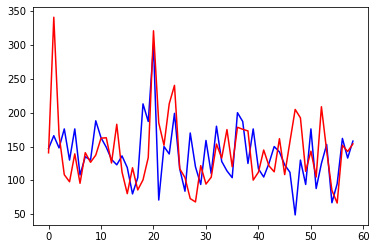

In [85]:
import matplotlib.pyplot as plt
plt.plot(act,c="blue")
plt.plot(pred,c="red")

# if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

In [86]:
B['Duration']=B.Loan_Amount_Term/12


In [87]:
data_for_pred = B[(B.Duration<=20)&(B.Loan_Status=="Y")]
data_for_pred_final = data_for_pred.drop(labels=['Duration','Loan_ID','Loan_Status',"Loan_Amount_Term"],axis=1)
data_for_pred_final.index = range(0,data_for_pred_final.shape[0])

In [88]:
data_for_pred_final.head(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


In [89]:
data_for_pred_final.head(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,Male,Yes,2,Graduate,No,13633,0,280.0,1.000000,Urban
1,Male,No,3+,Graduate,No,4166,0,40.0,0.825444,Urban


# Prepare training data

In [90]:
T = A[A.Loan_Status == "Y"]
T1 = T[data_for_pred_final.columns]
T1.index = range(0,T1.shape[0])

In [91]:
xtrain = preprocessing(T1)

In [92]:
ytrain = T[["Loan_Amount_Term"]]


In [93]:
ytrain.index = range(0,ytrain.shape[0])


In [94]:
replacer(data_for_pred_final)
final_pred = preprocessing(data_for_pred_final)

In [95]:
model = lm.fit(xtrain,ytrain)
pred = model.predict(final_pred)

In [96]:
U = B[(B.Duration<=20)&(B.Loan_Status=="Y")][["Loan_Amount_Term"]]
U.index = range(0,U.shape[0])

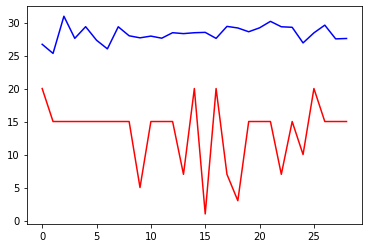

In [97]:
plt.plot(U/12,c="red")
plt.plot(pred/12,c="blue")

In [98]:
U.shape


(29, 1)

In [99]:
pred.shape


(29, 1)

In [100]:
U


,Loan_Amount_Term
0,240.0
1,180.0
2,180.0
3,180.0
4,180.0
5,180.0
6,180.0
7,180.0
8,180.0
9,60.0
